## Study on the Intake, Enrollment and Graduates of various institutions in Singapore

#### Team Members:
- Lim Dao Jun
- Tan Jeng Woon
- Thanmaya Sivadasan
- Fong Wei De, Elgin

Class: 19 July 2020 3.45pm

### Introduction to Problem Statement
Were you ever curious about which instituions are the most popular among students? Does more employers choose to hire students from NUS, given that it is presumed to be the top SouthEast Asian University? How does each instutions fare against each other?

In this project, we would be looking at the intake, enrollment and graduates from various institutions from Singapore, and see how they fare against each other. Additionally, we would be comparing the gender ratio in the top 5 courses as it would be interesting to see where the trend is now! We would be using the employment rate of each institution to gauge how is the employment rate of each course and instituion. With our careful analysis, we can find out if there is a specific instituion that employers are looking for, the numbers of each institution and who is the cream of the crop after all!!

### Data Sources

The 1st and 2nd datasets used for our projects consists of the numbers for each course from each institutions from Years 2013 - 2018, which are recent and can be used for valid analysis. 

The 3rd dataset is the employment rate of each insitutions categorised by their degree which would allow us to analyse for the most popular course and institution, from Years 2013 - 2018.

All datasets includes institutions from NUS, NTU, SMU, SUTD, SIT and SUSS.

##### Sources
- [Intake, Enrolment and Graduates by Institutions](https://data.gov.sg/dataset/intake-enrolment-and-graduates-by-institutions?resource_id=2264a6ed-51f5-45d6-accb-1a980e32e632)
- [Universities - Intake, Enrolment and Graduates by Course](https://data.gov.sg/dataset/universities-intake-enrolment-and-graduates-by-course)
- [Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD](https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd)

### Methodology
Data Cleaning, Datasets Aggregation, Exloratory Data Analysis (EDA), Visualization

### Our Approach
To analyse our data in greater detail, we have structured our analysis into 4 key sections. The framework for our analysis is shown below:
1. Data Cleaning
2. Exploratary Data Analysis
3. Analysis of Data - Visualization
4. Predictive Modelling

# Libraries Imported for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
sns.set()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning 

To start of our project, it was important for us to get a sense of the various datasets and then clean it before we can analyse in greater detail.

#### Data Handling
We first began reading each datasets to a dataframe with an easily recognisable name for each dateframe.

In [2]:
# Read the various CSV files into DateFrame
intake_df = pd.read_csv("intake-by-institutions.csv")
enrolment_df = pd.read_csv("enrolment-by-institutions.csv")
graduates_df = pd.read_csv("graduates-by-institutions.csv")
employment_df = pd.read_csv("graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv", encoding="latin-1")
courses_df = pd.read_csv("universities-intake-enrolment-and-graduates-by-course.csv")

In [3]:
display(intake_df.head())

,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1982,MF,3937,582,-,-,-,-,888,2095,1614,-,-,-,-,-,-,-,8623
1,1982,F,2024,57,-,-,-,-,739,429,498,-,-,-,-,-,-,-,1336
2,1983,MF,4161,702,-,-,-,-,678,2597,2250,-,-,-,-,-,-,-,8881
3,1983,F,2478,63,-,-,-,-,502,550,892,-,-,-,-,-,-,-,1985
4,1984,MF,4441,690,-,-,-,-,595,2993,3405,-,-,-,-,-,-,-,6426


In [4]:
display(enrolment_df.head())

,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1982,MF,11093,582,-,-,-,-,1000,5339,3660,-,-,-,-,-,-,-,10303
1,1982,F,5563,57,-,-,-,-,808,1069,1153,-,-,-,-,-,-,-,2130
2,1983,MF,11939,1267,-,-,-,-,1078,6136,4825,-,-,-,-,-,-,-,10664
3,1983,F,6596,120,-,-,-,-,853,1318,1650,-,-,-,-,-,-,-,2753
4,1984,MF,12721,1945,-,-,-,-,776,7129,6919,-,-,-,-,-,-,-,9419


In [5]:
display(graduates_df.head())

,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1983,MF,2905,0,-,-,-,-,597,1624,928,-,-,-,-,-,-,-,6779
1,1983,F,1508,0,-,-,-,-,453,316,343,-,-,-,-,-,-,-,905
2,1984,MF,3409,0,-,-,-,-,875,1773,1293,-,-,-,-,-,-,-,6281
3,1984,F,1826,0,-,-,-,-,687,371,456,-,-,-,-,-,-,-,1785
4,1985,MF,3454,557,-,-,-,-,531,1862,1543,-,-,-,-,-,-,-,7597


In [6]:
display(employment_df.head())

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [7]:
display(courses_df.head())

,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495
2,2005,MF,"Architecture, Building & Real Estate",299,1310,180
3,2005,F,"Architecture, Building & Real Estate",175,786,106
4,2005,MF,Business & Administration,1545,5013,1256


# Steps for Data Cleaning

- **i) Understand datasets and data type** - Understand the respective data types
- **ii) Identify unncessary Columns/Rows and Null Values** - Filter for the specific information and check which columns contain null values, then filter for Null Values
- **iii) Check for uniqueness then convert necessary columns to correct dtypes** - Filter for correctness of data
- **iv) Conduct descriptive analysis** - Check for irregularilities

## i) Understand datasets and data types
Using df_info, we can find out the various data types of each columns as well as the columns names

In [8]:
print(intake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   74 non-null     int64 
 1   sex                    74 non-null     object
 2   nus                    74 non-null     int64 
 3   ntu                    74 non-null     int64 
 4   smu                    74 non-null     object
 5   sit                    74 non-null     object
 6   sutd                   74 non-null     object
 7   suss                   74 non-null     object
 8   nie                    74 non-null     int64 
 9   singapore_polytechnic  74 non-null     int64 
 10  ngee_ann_polytechnic   74 non-null     int64 
 11  temasek_polytechnic    74 non-null     object
 12  nanyang_polytechnic    74 non-null     object
 13  republic_polytechnic   74 non-null     object
 14  lasalle_diploma        74 non-null     object
 15  lasalle_degree         74

In [9]:
print(enrolment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   74 non-null     int64 
 1   sex                    74 non-null     object
 2   nus                    74 non-null     int64 
 3   ntu                    74 non-null     int64 
 4   smu                    74 non-null     object
 5   sit                    74 non-null     object
 6   sutd                   74 non-null     object
 7   suss                   74 non-null     object
 8   nie                    74 non-null     int64 
 9   singapore_polytechnic  74 non-null     int64 
 10  ngee_ann_polytechnic   74 non-null     int64 
 11  temasek_polytechnic    74 non-null     object
 12  nanyang_polytechnic    74 non-null     object
 13  republic_polytechnic   74 non-null     object
 14  lasalle_diploma        74 non-null     object
 15  lasalle_degree         74

In [10]:
print(graduates_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   72 non-null     int64 
 1   sex                    72 non-null     object
 2   nus                    72 non-null     int64 
 3   ntu                    72 non-null     int64 
 4   smu                    72 non-null     object
 5   sit                    72 non-null     object
 6   sutd                   72 non-null     object
 7   suss                   72 non-null     object
 8   nie                    72 non-null     int64 
 9   singapore_polytechnic  72 non-null     int64 
 10  ngee_ann_polytechnic   72 non-null     int64 
 11  temasek_polytechnic    72 non-null     object
 12  nanyang_polytechnic    72 non-null     object
 13  republic_polytechnic   72 non-null     object
 14  lasalle_diploma        72 non-null     object
 15  lasalle_degree         72

In [11]:
print(employment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       703 non-null    int64 
 1   university                 703 non-null    object
 2   school                     703 non-null    object
 3   degree                     703 non-null    object
 4   employment_rate_overall    703 non-null    object
 5   employment_rate_ft_perm    703 non-null    object
 6   basic_monthly_mean         703 non-null    object
 7   basic_monthly_median       703 non-null    object
 8   gross_monthly_mean         703 non-null    object
 9   gross_monthly_median       703 non-null    object
 10  gross_mthly_25_percentile  703 non-null    object
 11  gross_mthly_75_percentile  703 non-null    object
dtypes: int64(1), object(11)
memory usage: 66.0+ KB
None


In [12]:
print(courses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       420 non-null    int64 
 1   sex        420 non-null    object
 2   course     420 non-null    object
 3   intake     420 non-null    object
 4   enrolment  420 non-null    object
 5   graduates  420 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.8+ KB
None


### Insights: 

From our analysis, we learned that the datasets consists some irregularities that needs to be fixed:
- From intake_df,enrolment_df and graduates_df 
    - Contains extra columns that is not required for our analysis
    - 19 columns for all datasets, 74 rows for intake_df and enrolment_df while there are 72 rows for graduates_df
    - Dtypes of "smu", "sit", "sutd", "suss" are object instead of int64
    - Filter for Years 2013 - 2018

- From employment_df
    - Contains unncessary columns that is not required for our analysis 
    - 703 rows and 12 columns
    - Dtype of "employment_rate_overall" is object instead of int_64
    
- From courses_df
    - 420 rows and 6 columns
    - Dtype of "intake", "enrolment" and "graduates" are object instead of int_64
    - Filter for Years 2013 - 2018

## ii) Identify unncessary Columns/Rows and Null Values
The data we are analysing includes:
1. NUS, NTU, SMU, SIT, SUSS, SUTD
2. Years 2013 - 2018

Hence, these 2 conditions would filter for the unnessary data that are included in the datasets.

In [13]:
# filter for relevant columns that we need
relevant_columns = ["year", "sex", "nus", "ntu", "smu", "sit", "sutd", "suss"]

intake_clean_df = intake_df[relevant_columns]
enrolment_clean_df = enrolment_df[relevant_columns]
graduates_clean_df = graduates_df[relevant_columns]

# filter for information till the 5th column
employment_clean_df = employment_df.iloc[:,:5]
employment_clean_df = employment_clean_df.drop(["degree"], axis=1)

In [14]:
# filter for relevant Years that we need
intake_clean_df = intake_clean_df[intake_clean_df["year"] > 2012]
enrolment_clean_df = enrolment_clean_df[enrolment_df["year"] > 2012]
graduates_clean_df = graduates_clean_df[graduates_df["year"] > 2012]
courses_clean_df = courses_df[courses_df["year"] > 2012]

## iii) Check for uniqueness then convert necessary columns to correct dtypes
**Insights:**
- As seen from the dataframe of the various datasets, there are "NA" values which are substitued as "-", hence we would need to clean the data.
- This was due to the fact that SUSS started operations in the Year2014, hence explains the missing data. Similarly, SUTD's first batch of graduates graduated from 2015, hence explaining the missing data.
- We found that there were "NA" values from the employment data set. To clean them up, we decided to just remove them from the dataset as NA values would not be beneifical and useful to us.
- We found that courses_df have dissimilar way of inserting the numerical values, some with "," and some without. (e.g. 1,568 compared with 1568)

**Actions Taken:**
- Check for null values in each dataframe
- Replacing before converting the column to a type of int
- Dropping rows
- Standardising the numerical values

In [15]:
# Check for null values
intake_clean_df.isnull().any() # intake_df has none
enrolment_clean_df.isnull().any() # enrolment_df has none
graduates_clean_df.isnull().any() # graduates_df has none
employment_clean_df.isnull().any() # employment_df has none
courses_clean_df.isnull().any() # courses_df has none

year         False
sex          False
course       False
intake       False
enrolment    False
graduates    False
dtype: bool

In [16]:
display(intake_clean_df)
display(enrolment_clean_df)
display(graduates_clean_df)

,year,sex,nus,ntu,smu,sit,sutd,suss
62,2013,MF,6892,6660,1924,1510,265,-
63,2013,F,3685,3537,983,627,103,-
64,2014,MF,7108,6480,1912,1836,317,217
65,2014,F,3857,3153,908,813,125,145
66,2015,MF,6935,6525,1944,2076,362,284
67,2015,F,3720,3140,1062,907,167,196
68,2016,MF,7011,6138,1961,2559,460,423
69,2016,F,3680,2964,1052,1196,172,286
70,2017,MF,7121,5955,2004,2589,424,575
71,2017,F,3468,2867,1103,1066,151,418


,year,sex,nus,ntu,smu,sit,sutd,suss
62,2013,MF,26156,22777,7297,3051,583,-
63,2013,F,13532,11517,3789,1317,249,-
64,2014,MF,26797,23021,7515,3557,886,217
65,2014,F,14042,11623,3883,1482,363,145
66,2015,MF,27288,23512,7740,4039,1235,489
67,2015,F,14423,11860,4062,1693,522,330
68,2016,MF,27702,23495,7827,5230,1381,896
69,2016,F,14617,11633,4047,2306,551,609
70,2017,MF,28134,22934,7979,6138,1545,1451
71,2017,F,14600,11079,4193,2626,603,1011


,year,sex,nus,ntu,smu,sit,sutd,suss
60,2013,MF,6395,6476,1659,958,-,-
61,2013,F,3281,3310,834,559,-,-
62,2014,MF,6210,5993,1602,1236,-,-
63,2014,F,3224,2951,772,583,-,-
64,2015,MF,6179,5756,1639,1364,298,-
65,2015,F,3192,2777,840,602,136,-
66,2016,MF,6305,5856,1804,1285,246,-
67,2016,F,3332,3066,1030,539,93,-
68,2017,MF,6446,6174,1779,1494,267,-
69,2017,F,3350,3266,920,695,107,-


### Updated datasets for intake, enrolment and graduates dataframes 

Upon looking at the datasets, there are "-" in the datasets which needs to be changed to 0

We can now change the dtypes of those columns to int64.

In [17]:
intake_clean_df["suss"].replace("-", 0, inplace=True)
enrolment_clean_df["suss"].replace("-", 0, inplace=True)
graduates_clean_df["suss"].replace("-", 0, inplace=True)
graduates_clean_df["sutd"].replace("-", 0, inplace=True)

intake_clean_df[["smu", "sit", "sutd", "suss"]] = intake_clean_df[["smu", "sit", "sutd", "suss"]].apply(pd.to_numeric)
enrolment_clean_df[["smu", "sit", "sutd", "suss"]] = enrolment_clean_df[["smu", "sit", "sutd", "suss"]].apply(pd.to_numeric)
graduates_clean_df[["smu", "sit", "sutd", "suss"]] = graduates_clean_df[["smu", "sit", "sutd", "suss"]].apply(pd.to_numeric)

### Updated dataset for employment rate dataframe

Since the data contains "na" values, which we are unable to replace with. We have decided to drop those rows which contain them.

We can now change the dtypes of the column to float64.

In [18]:
# Setting the condition 
cond = employment_clean_df["employment_rate_overall"] != "na"

# Clean the data by creating a new df without the na values
employment_clean_df = employment_clean_df[cond]
employment_clean_df["employment_rate_overall"] = employment_clean_df["employment_rate_overall"].apply(pd.to_numeric)

### Updated dataset for courses dataframe

We found out that are dissimilar methods when they insert the values in the dataset, with some thousands place having the "," while some does not contain the ",". 

We performed some manipulation to remove the ",", and convert it to type int64.

In [19]:
# To perform string methods, convert dtype object to string
courses_clean_df[["intake", "enrolment", "graduates"]] = courses_clean_df[["intake", "enrolment", "graduates"]].astype('string')

# To remove the "," in some of the numerical values
courses_clean_df["intake"] = courses_clean_df["intake"].str.replace(',', '')
courses_clean_df["enrolment"] = courses_clean_df["enrolment"].str.replace(',', '')
courses_clean_df["graduates"] = courses_clean_df["graduates"].str.replace(',', '')

# Convert them to int64 values
courses_clean_df[["intake", "enrolment", "graduates"]]= courses_clean_df[["intake", "enrolment", "graduates"]].astype("int64")

## iv) Conduct descriptive analysis

In this section, we checked if any numeric values for 0 value or negative values using descriptive analysis. 

**Insights:**
All of the data points seem good and ready for analysis!

In [20]:
display(intake_clean_df.describe()) 
display(enrolment_clean_df.describe())
display(graduates_clean_df.describe())
display(employment_clean_df.describe())
display(courses_clean_df.describe())

,year,nus,ntu,smu,sit,sutd,suss
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,5456.000000,4705.666667,1520.333333,1575.916667,261.500000,318.916667
std,1.783765,1795.869959,1704.203164,494.144133,743.353392,132.818742,231.066877
min,2013.000000,3468.000000,2867.000000,908.000000,627.000000,103.000000,0.000000
25%,2014.000000,3711.250000,3096.000000,1059.500000,1026.250000,154.000000,183.250000
50%,2015.500000,5515.500000,4746.000000,1571.000000,1353.000000,218.500000,285.000000
75%,2017.000000,7035.250000,6240.000000,1948.250000,2196.750000,377.500000,446.250000
max,2018.000000,7856.000000,6660.000000,2161.000000,2660.000000,460.000000,767.000000


,year,nus,ntu,smu,sit,sutd,suss
count,12.000000,12.000000,12.000000,12.000000,12.0000,12.000000,12.000000
mean,2015.500000,20942.416667,17263.333333,5916.666667,3441.2500,850.166667,716.333333
std,1.783765,6911.555508,6096.983566,1940.826972,1833.0773,481.021609,654.727887
min,2013.000000,13532.000000,10896.000000,3789.000000,1317.0000,249.000000,0.000000
25%,2014.000000,14555.750000,11596.500000,4058.250000,2152.7500,543.750000,199.000000
50%,2015.500000,20568.500000,17318.500000,5891.500000,2978.0000,614.500000,549.000000
75%,2017.000000,27391.500000,22955.750000,7761.750000,4336.7500,1271.500000,1108.000000
max,2018.000000,29037.000000,23512.000000,8182.000000,6951.0000,1658.000000,2049.000000


,year,nus,ntu,smu,sit,sutd,suss
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,4851.666667,4547.333333,1305.750000,984.000000,136.083333,23.333333
std,1.783765,1596.759066,1575.434678,451.772695,422.223767,124.914122,55.787476
min,2013.000000,3192.000000,2777.000000,772.000000,539.000000,0.000000,0.000000
25%,2014.000000,3319.250000,3037.750000,887.250000,597.250000,0.000000,0.000000
50%,2015.500000,4892.500000,4533.000000,1316.000000,853.500000,121.500000,0.000000
75%,2017.000000,6327.500000,5990.750000,1689.000000,1304.750000,251.250000,0.000000
max,2018.000000,6700.000000,6476.000000,1887.000000,1744.000000,334.000000,168.000000


,year,employment_rate_overall
count,630.000000,630.000000
mean,2015.687302,90.544921
std,1.661018,6.911726
min,2013.000000,66.700000
25%,2014.000000,86.025000
50%,2016.000000,91.300000
75%,2017.000000,96.200000
max,2018.000000,100.000000


,year,intake,enrolment,graduates
count,180.000000,180.000000,180.000000,180.000000
mean,2015.500000,922.555556,3275.344444,789.877778
std,1.712589,1097.693581,3832.129127,922.607300
min,2013.000000,30.000000,124.000000,27.000000
25%,2014.000000,207.000000,775.500000,218.250000
50%,2015.500000,413.500000,1586.500000,392.500000
75%,2017.000000,1385.500000,4780.000000,1107.750000
max,2018.000000,5255.000000,17656.000000,4475.000000


# 2. Exploratory Data Analysis (EDA)

Now that we have cleaned the data, we can now begin to conduct Exploratory Data Analysis.

First we will just reset the index of each dataset. 

Plots that would be analysed:
- A) A line plot of intake, enrolment, graduates of each institution
- B) A line plot of the intake of each course
- C) Gender ratio of the top 5 course
- D) A line graph of the normalised graduates
- E) Employment rate of each course and university

In [21]:
# reset the index of all dataframes
intake_clean_df.reset_index()
enrolment_clean_df.reset_index()
graduates_clean_df.reset_index()
courses_clean_df.reset_index()
employment_clean_df.reset_index()

,index,year,university,school,employment_rate_overall
0,0,2013,Nanyang Technological University,College of Business (Nanyang Business School),97.4
1,1,2013,Nanyang Technological University,College of Business (Nanyang Business School),97.1
2,2,2013,Nanyang Technological University,College of Business (Nanyang Business School),90.9
3,3,2013,Nanyang Technological University,College of Business (Nanyang Business School),87.5
4,4,2013,Nanyang Technological University,College of Engineering,95.3
...,...,...,...,...,...
625,698,2018,Singapore Management University,School of Law (4-year programme) *,92.7
626,699,2018,Singapore Management University,School of Law (4-year programme) *,94.4
627,700,2018,Singapore University of Social Sciences,School of Business,98.7
628,701,2018,Singapore University of Social Sciences,School of Business,88.0


## A) Plotting a line plot of the intake, enrolment and graduates


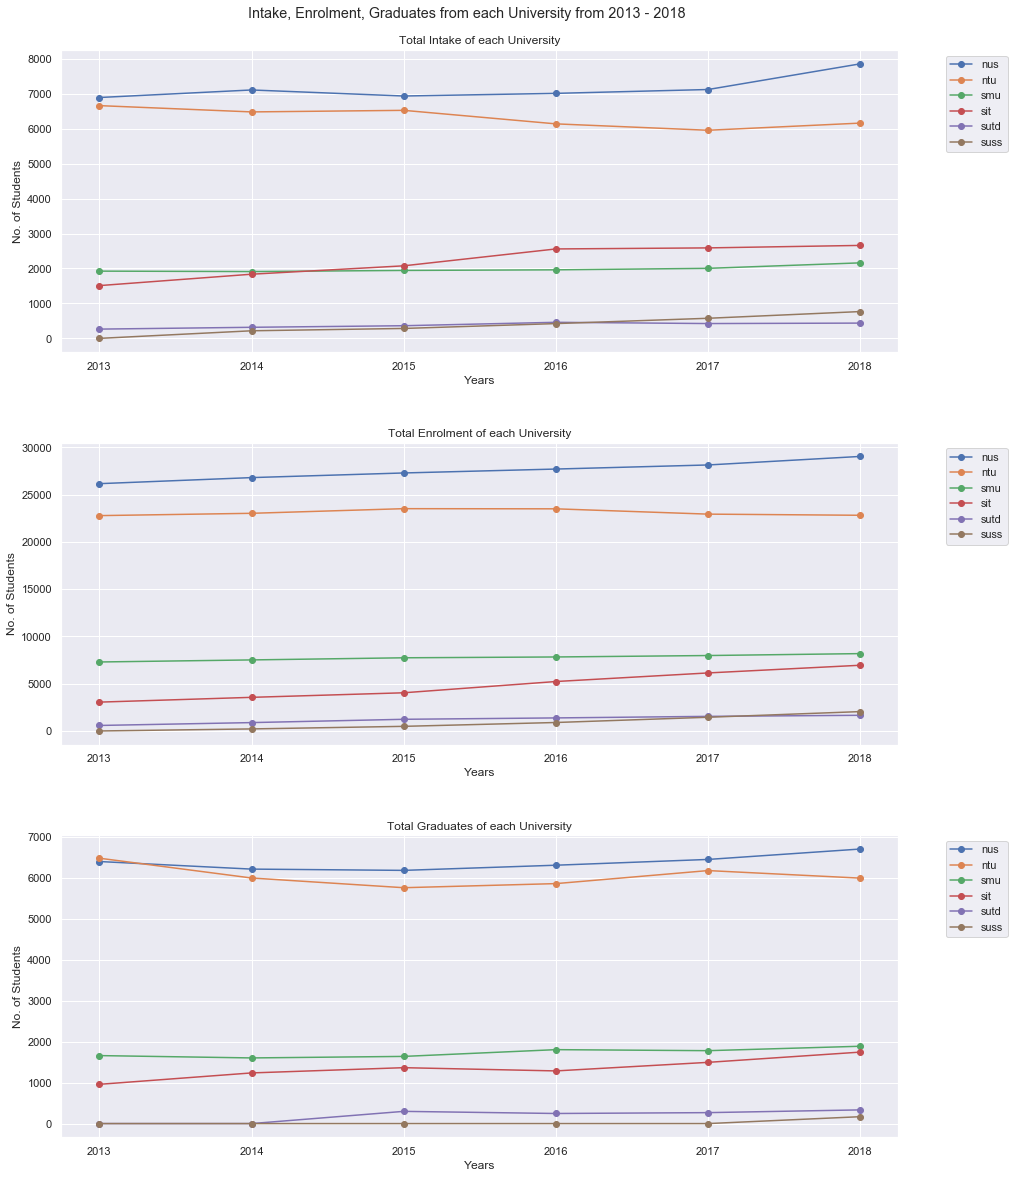

In [22]:
# plot intake of each university vs time
total_intake_df = intake_clean_df[intake_clean_df["sex"] == "MF"]
total_enrolment_df = enrolment_clean_df[enrolment_clean_df["sex"] == "MF"]
total_graduates_df = graduates_clean_df[graduates_clean_df["sex"] == "MF"]

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

total_intake_df.plot(kind="line",
                     x="year",
                     marker="o",
                     ax=ax1)
ax1.set_title("Total Intake of each University")
ax1.set_ylabel("No. of Students")
ax1.set_xlabel("Years")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

total_enrolment_df.plot(kind="line",
                        x="year",
                        marker="o",
                        ax= ax2)
ax2.set_title("Total Enrolment of each University")
ax2.set_ylabel("No. of Students")
ax2.set_xlabel("Years")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

total_graduates_df.plot(kind="line",
                        x="year",
                        marker="o",
                        ax= ax3)
ax3.set_title("Total Graduates of each University")
ax3.set_ylabel("No. of Students")
ax3.set_xlabel("Years")
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.suptitle("Intake, Enrolment, Graduates from each University from 2013 - 2018", y=0.91)
plt.show()

### Analysis
- NUS remains the top intake and enrolment of students since 2013, this may be due to them being the top ranking SEA University that makes them so appealable
- SIT has seen a steady increase in intake and enrolment of students since 2013
- NUS and NTU remains the top 2 which is due to their capacity for students, hence it is normal.

## B) A line plot of the intake of each course

['Accountancy' 'Architecture, Building & Real Estate'
 'Business & Administration' 'Dentistry' 'Education'
 'Engineering Sciences' 'Fine & Applied Arts' 'Health Sciences'
 'Humanities & Social Sciences' 'Information Technology' 'Law'
 'Mass Communication' 'Medicine'
 'Natural, Physical & Mathematical Sciences' 'Services']


enrolment                                       \
course Accountancy Architecture, Building & Real Estate   
year                                                      
2013          4042                                 1883   
2014          4368                                 1990   
2015          4723                                 1973   
2016          5090                                 1980   
2017          5226                                 2015   
2018          5219                                 1993   

                                                                           \
course Business & Administration Dentistry Education Engineering Sciences   
year                                                                        
2013                        6188       207      1282                16187   
2014                        6577       216      1065                16606   
2015                        7138       219       955                16677   
2016                        7514       220       743                16975   
2017                        8165       217       627                17169   
2018                        9018       224       549                17656   

                                                                         \
course Fine & Applied Arts Health Sciences Humanities & Social Sciences   
year                                                                      
2013                  1492            1441                        10645   
2014                  1578            1498                        11291   
2015                  1599            1567                        11915   
2016                  1628            1860                        12495   
2017                  1629            2244                        12660   
2018                  1607            2678                        12973   

                               ...               intake                      \
course Information Technology  ... Engineering Sciences Fine & Applied Arts   
year                           ...                                            
2013                     4058  ...                 4733                 471   
2014                     4152  ...                 4938                 491   
2015                     4541  ...                 4934                 466   
2016                     4810  ...                 4997                 458   
2017                     5360  ...                 5255                 464   
2018                     6143  ...                 5213                 410   

                                                                            \
course Health Sciences Humanities & Social Sciences Information Technology   
year                                                                         
2013               541                         3186                   1086   
2014               544                         3129                   1166   
2015               569                         3191                   1247   
2016               798                         3219                   1379   
2017               962                         3173                   1579   
2018              1001                         3368                   2039   

                                         \
course  Law Mass Communication Medicine   
year                                      
2013    403                186      354   
2014    397                185      379   
2015    405                221      390   
2016    399                190      410   
2017    391                189      423   
2018    480                188      437   

                                                           
course Natural, Physical & Mathematical Sciences Services  
year                                                       
2013                                        2237      317  
2014                                        2276      123  
2015

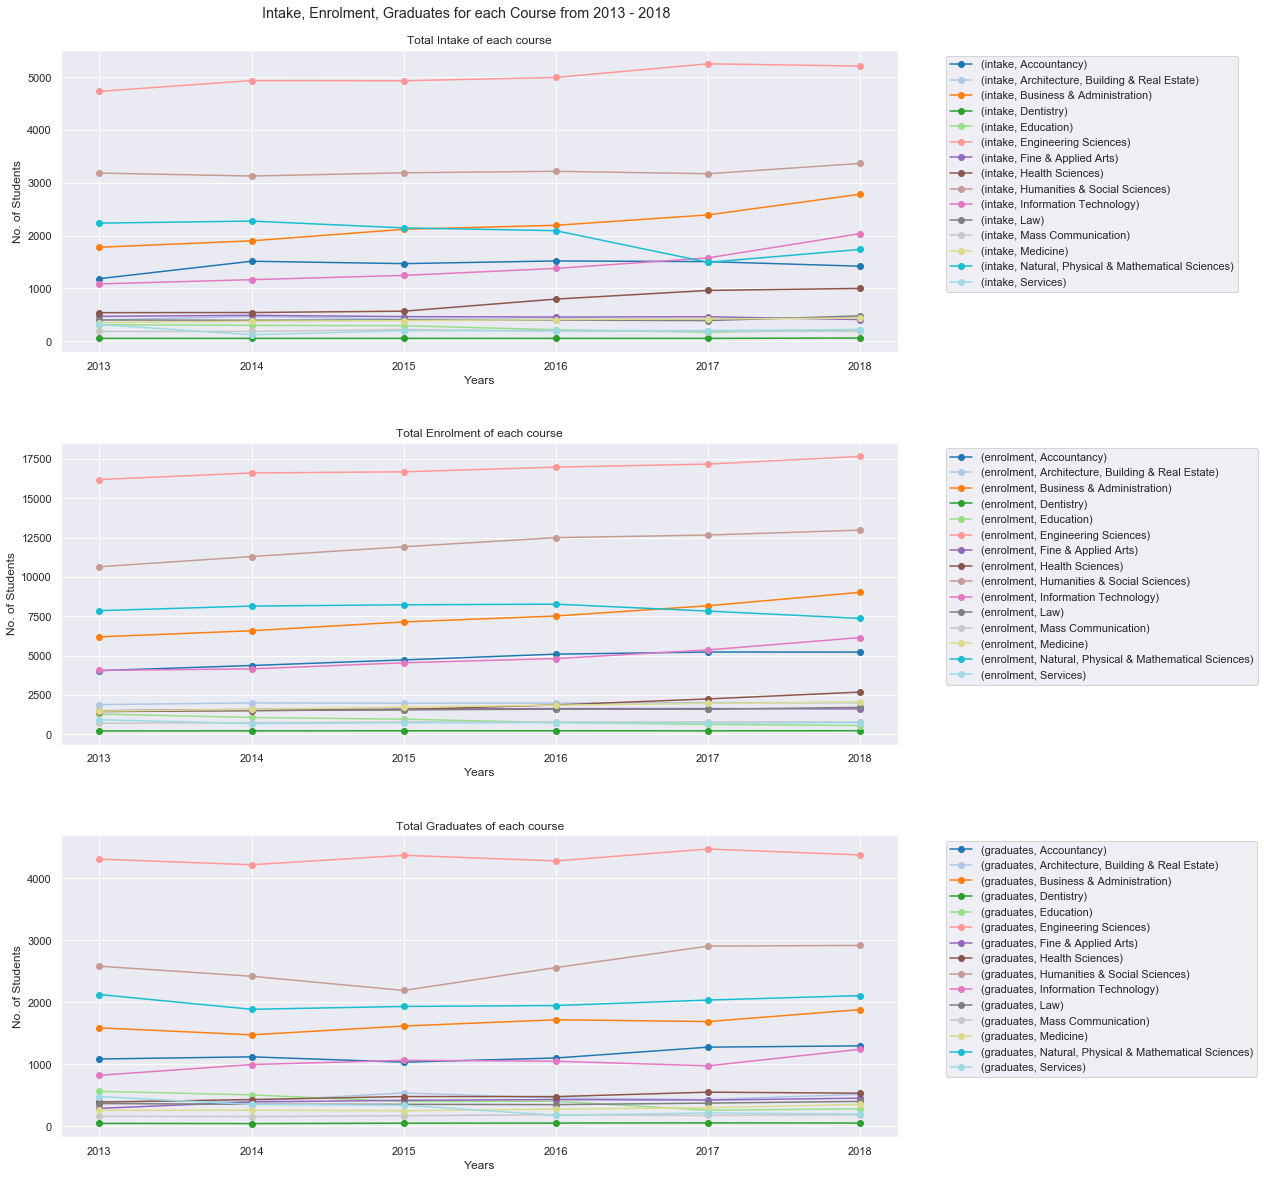

In [23]:
# filter for the total students per courses
total_courses = courses_clean_df[courses_clean_df["sex"] == "MF"]
total_courses = total_courses.drop(["sex"], axis=1)

# find out how many courses are there
print(total_courses["course"].unique())

# Change to a pivot table
total_courses_pivot = pd.pivot_table(total_courses, index=["year"], columns=["course"], values=["intake", "enrolment", "graduates"])
display(total_courses_pivot)

# Pluck out the information from the pivot table we need into individual dataframe
intake_pivot_df = total_courses_pivot[["intake"]]
enrolment_pivot_df = total_courses_pivot[["enrolment"]]
graduates_pivot_df = total_courses_pivot[["graduates"]]

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

intake_pivot_df.plot(kind="line",
                     marker="o",
                     cmap="tab20",
                     ax=ax1)
ax1.set_title("Total Intake of each course")
ax1.set_ylabel("No. of Students")
ax1.set_xlabel("Years")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

enrolment_pivot_df.plot(kind="line",
                        marker="o",
                        cmap="tab20",
                        ax=ax2)
ax2.set_title("Total Enrolment of each course")
ax2.set_ylabel("No. of Students")
ax2.set_xlabel("Years")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

graduates_pivot_df.plot(kind="line",
                        marker="o",
                        cmap="tab20",
                        ax=ax3)
ax3.set_title("Total Graduates of each course")
ax3.set_ylabel("No. of Students")
ax3.set_xlabel("Years")
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.suptitle("Intake, Enrolment, Graduates for each Course from 2013 - 2018", y=0.91)
plt.show()

### Analysis
- Engineering Sciences has been the most popular course among University students, it has the highest intake and enrolment throughout 2013 - 2018.
- It is also interesting to see that Humanities and Social Sciences is the 2nd most popular course, this may be attributed to the increased research and spending on this.
- It was also noted that Information Technology and Business & Adminstration is increasing at a higher rate than the rest, goes to show how the focus is moving towards entrepreneurship and technology.

Interesting Reads

- https://www.todayonline.com/commentary/singapore-must-guard-against-dearth-engineering-talent
- https://www.straitstimes.com/singapore/fewer-singaporeans-are-choosing-careers-in-stem-survey

## C) Gender ratio of the top 5 course

In [24]:
# We can analyse the top 5 courses with the gender differential, namely Engineering Sciences, Humanities & Social Sciences, 
# Natural, Physical & Mathematical Sciences, Business & Administration and Information Technology

# Prepare the data, filter for the top 5 courses
top5_courses_df = courses_clean_df[courses_clean_df["course"].isin(["Engineering Sciences", "Humanities & Social Sciences", "Natural, Physical & Mathematical Sciences", "Business & Administration", "Information Technology"])]

# Soley focus on enrolment since enrolment would mean the actual ratio of gender in each course
top5_courses_df = top5_courses_df.drop(["intake", "graduates"], axis=1)

# create a pivot table first
top5_courses_pivot = pd.pivot_table(top5_courses_df, index=["year", "course"], columns=["sex"], values=["enrolment"])
top5_courses_pivot = top5_courses_pivot.reset_index()

# Create the column of male students
top5_courses_pivot["enrolment", "M"] = top5_courses_pivot["enrolment", "MF"] - top5_courses_pivot["enrolment", "F"]

# Normalise both columns "F" and "M" to a percentage out of the total
top5_courses_pivot["enrolment", "Female ratio"] = top5_courses_pivot["enrolment" , "F"] / top5_courses_pivot["enrolment", "MF"]
top5_courses_pivot["enrolment", "Male ratio"] = top5_courses_pivot["enrolment" , "M"] / top5_courses_pivot["enrolment", "MF"]
display(top5_courses_pivot)

year                                     course enrolment                \
sex                                                          F     MF      M   
0    2013                  Business & Administration      3406   6188   2782   
1    2013                       Engineering Sciences      4893  16187  11294   
2    2013               Humanities & Social Sciences      7095  10645   3550   
3    2013                     Information Technology      1321   4058   2737   
4    2013  Natural, Physical & Mathematical Sciences      4715   7855   3140   
5    2014                  Business & Administration      3597   6577   2980   
6    2014                       Engineering Sciences      5050  16606  11556   
7    2014               Humanities & Social Sciences      7535  11291   3756   
8    2014                     Information Technology      1343   4152   2809   
9    2014  Natural, Physical & Mathematical Sciences      4922   8145   3223   
10   2015                  Business & Administration      4027   7138   3111   
11   2015                       Engineering Sciences      4970  16677  11707   
12   2015               Humanities & Social Sciences      8054  11915   3861   
13   2015                     Information Technology      1492   4541   3049   
14   2015  Natural, Physical & Mathematical Sciences      4989   8226   3237   
15   2016                  Business & Administration      4230   7514   3284   
16   2016                       Engineering Sciences      4859  16975  12116   
17   2016               Humanities & Social Sciences      8449  12495   4046   
18   2016                     Information Technology      1499   4810   3311   
19   2016  Natural, Physical & Mathematical Sciences      4967   8267   3300   
20   2017                  Business & Administration      4665   8165   3500   
21   2017                       Engineering Sciences      4770  17169  12399   
22   2017               Humanities & Social Sciences      8475  12660   4185   
23   2017                     Information Technology      1599   5360   3761   
24   2017  Natural, Physical & Mathematical Sciences      4544   7826   3282   
25   2018                  Business & Administration      5277   9018   3741   
26   2018                       Engineering Sciences      4909  17656  12747   
27   2018               Humanities & Social Sciences      8753  12973   4220   
28   2018                     Information Technology      1905   6143   4238   
29   2018  Natural, Physical & Mathematical Sciences      4136   7361   3225   

                             
sex Female ratio Male ratio  
0       0.550420   0.449580  
1       0.302280   0.697720  
2       0.666510   0.333490  
3       0.325530   0.674470  
4       0.600255   0.399745  
5       0.546906   0.453094  
6       0.304107   0.695893  
7       0.667346   0.332654  
8       0.323459   0.676541  
9       0.604297   0.395703  
10      0.564164   0.435836  
11      0.298015   0.701985  
12      0.675955   0.324045  
13      0.328562   0.671438  
14      0.606492   0.393508  
15      0.562949   0.437051  
16      0.286244   0.713756  
17      0.676190   0.323810  
18      0.311642   0.688358  
19      0.600823   0.399177  
20      0.571341   0.428659  
21      0.277826   0.722174  
22      0.669431   0.330569  
23      0.298321   0.701679  
24      0.580629   0.419371  
25      0.585163   0.414837  
26      0.278036   0.721964  
27      0.674709   0.325291  
28      0.310109   0.689891  
29      0.561880   0.438120

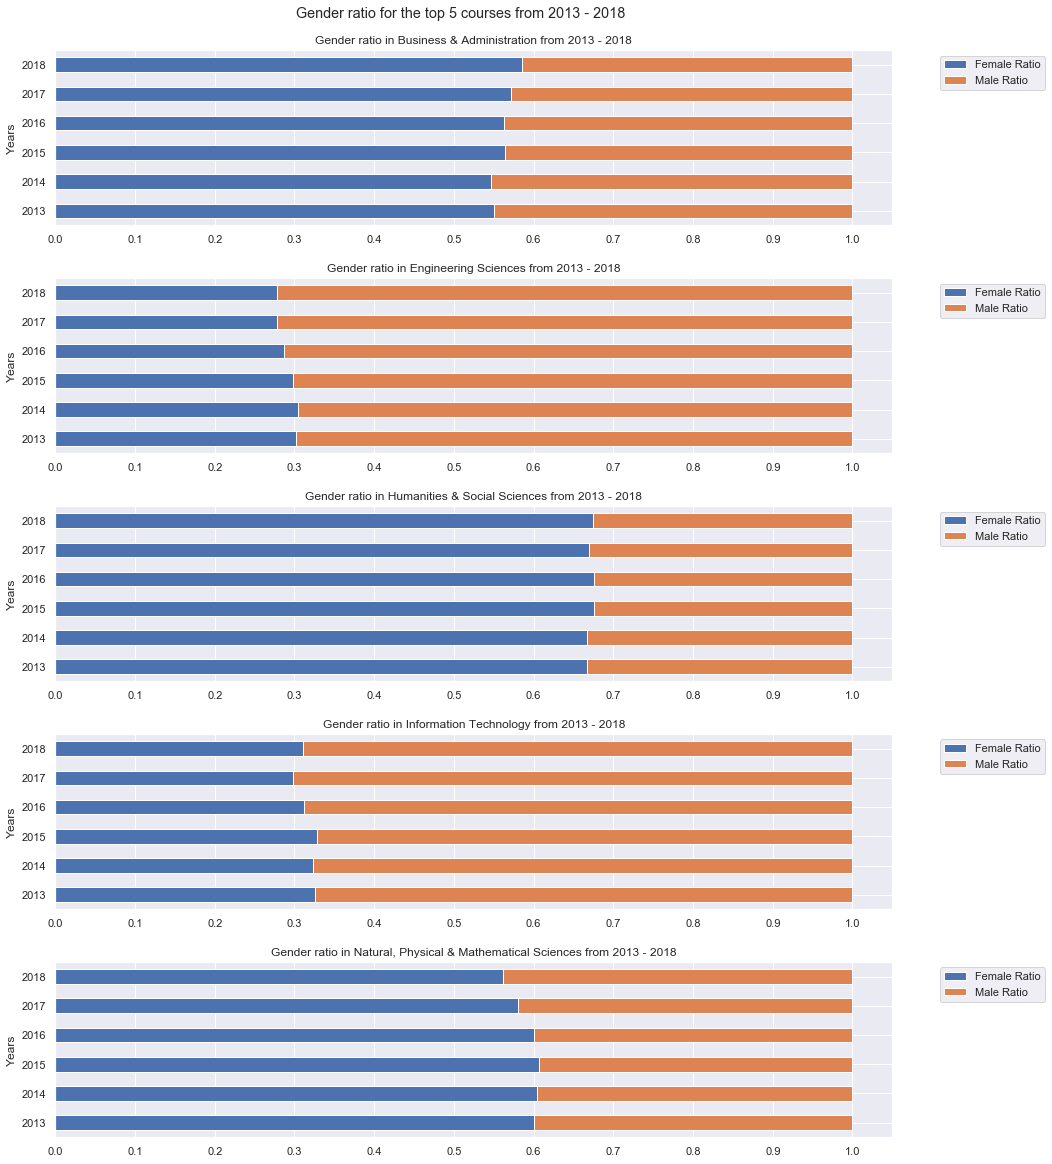

In [25]:
# After preparation of data, we can now understand the data by plotting a bar chart
f_ratio = top5_courses_pivot["enrolment", "Female ratio"]
m_ratio = top5_courses_pivot["enrolment", "Male ratio"]
year = top5_courses_pivot[["year"]]
courses = top5_courses_pivot[["course"]]

top5_courses_plot = pd.concat([year, courses, f_ratio, m_ratio], axis=1, ignore_index=True, )
top5_courses_plot.columns = ["Years", "Course", "Female Ratio", "Male Ratio"]

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)

# Compare the gender differential between the Years in Business & Administration
top5_courses_plot[top5_courses_plot["Course"] == "Business & Administration"].plot(kind="barh",
                                                                                   x="Years",
                                                                                   stacked=True,
                                                                                   ax=ax1)
ax1.set_title("Gender ratio in Business & Administration from 2013 - 2018")
ax1.set_xticks(np.arange(0, 1.1, 0.1))
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Compare the gender differential between the Years in Engineering Sciences
top5_courses_plot[top5_courses_plot["Course"] == "Engineering Sciences"].plot(kind="barh",
                                                                                   x="Years",
                                                                                   stacked=True,
                                                                                   ax=ax2)
ax2.set_title("Gender ratio in Engineering Sciences from 2013 - 2018")
ax2.set_xticks(np.arange(0, 1.1, 0.1))
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Compare the gender differential between the Years in Humanities & Social Sciences
top5_courses_plot[top5_courses_plot["Course"] == "Humanities & Social Sciences"].plot(kind="barh",
                                                                                   x="Years",
                                                                                   stacked=True,
                                                                                   ax=ax3)
ax3.set_title("Gender ratio in Humanities & Social Sciences from 2013 - 2018")
ax3.set_xticks(np.arange(0, 1.1, 0.1))
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Compare the gender differential between the Years in Information Technology
top5_courses_plot[top5_courses_plot["Course"] == "Information Technology"].plot(kind="barh",
                                                                                   x="Years",
                                                                                   stacked=True,
                                                                                   ax=ax4)
ax4.set_title("Gender ratio in Information Technology from 2013 - 2018")
ax4.set_xticks(np.arange(0, 1.1, 0.1))
ax4.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Compare the gender differential between the Years in Natural, Physical & Mathematical Sciences
top5_courses_plot[top5_courses_plot["Course"] == "Natural, Physical & Mathematical Sciences"].plot(kind="barh",
                                                                                   x="Years",
                                                                                   stacked=True,
                                                                                   ax=ax5)
ax5.set_title("Gender ratio in Natural, Physical & Mathematical Sciences from 2013 - 2018")
ax5.set_xticks(np.arange(0, 1.1, 0.1))
ax5.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.suptitle("Gender ratio for the top 5 courses from 2013 - 2018", y=0.91)
plt.show()

### Analysis
- Not surprisingly, Engineering Sciences maintained its aggressive male dominance at approximately 0.7! Additionally, Humanities & Social Sciences maintained its female dominance at approximately 0.67!
- Information and Technology seems to be male dominated as well, more can be seen from Wikipedia [https://en.wikipedia.org/wiki/Gender_disparity_in_computing]
- Business & Administration seems to be balanced, with a slight increase to over 0.6 on 2018. It would be intersting to see how has the gender ratio will turn out in 2019 and 2020.

## D) A line graph of the normalised graduates 

It is noted that some courses has a greater intake, hence it was obvious that particular course would have graduates.
We have decided to investigate the trend of each course, using the normalised value instead.

A longer time frame would be much better for analysis as the trendline. We would be using the whole dataset from 2005 - 2018. 

In [26]:
# Taking the entire dataset containing 2005 -2018 years of data and we do the previous cleaning we did above
# Basically these codes were copied from above
courses_plot_df = courses_df
courses_plot_df[["intake", "enrolment", "graduates"]] = courses_plot_df[["intake", "enrolment", "graduates"]].astype('string')

# To remove the "," in some of the numerical values
courses_plot_df["intake"] = courses_plot_df["intake"].str.replace(',', '')
courses_plot_df["enrolment"] = courses_plot_df["enrolment"].str.replace(',', '')
courses_plot_df["graduates"] = courses_plot_df["graduates"].str.replace(',', '')

# Convert them to int64 values
courses_plot_df[["intake", "enrolment", "graduates"]]= courses_plot_df[["intake", "enrolment", "graduates"]].astype("int64")

courses_plot_df = courses_plot_df[courses_plot_df["sex"] == "MF"]
courses_plot_df = courses_plot_df.drop(["sex"], axis=1)

courses_plot_pivot = pd.pivot_table(courses_plot_df, index=["year"], columns=["course"], values=["intake", "enrolment", "graduates"])

graduates_plot_pivot = courses_plot_pivot[["graduates"]]

In [27]:
# Create a normalisation function
calculate_normalised_graduates = lambda x: (x - min_number) / (max_number - min_number)

# Creating a column for the normalised values for each course
for pair in graduates_plot_pivot.columns:
    graduates_course = pair[1]
    max_number = graduates_plot_pivot["graduates", graduates_course].max()
    min_number = graduates_plot_pivot["graduates", graduates_course].min()
    graduates_plot_pivot[graduates_course + "_Normalised"] = graduates_plot_pivot["graduates", graduates_course].apply(calculate_normalised_graduates)

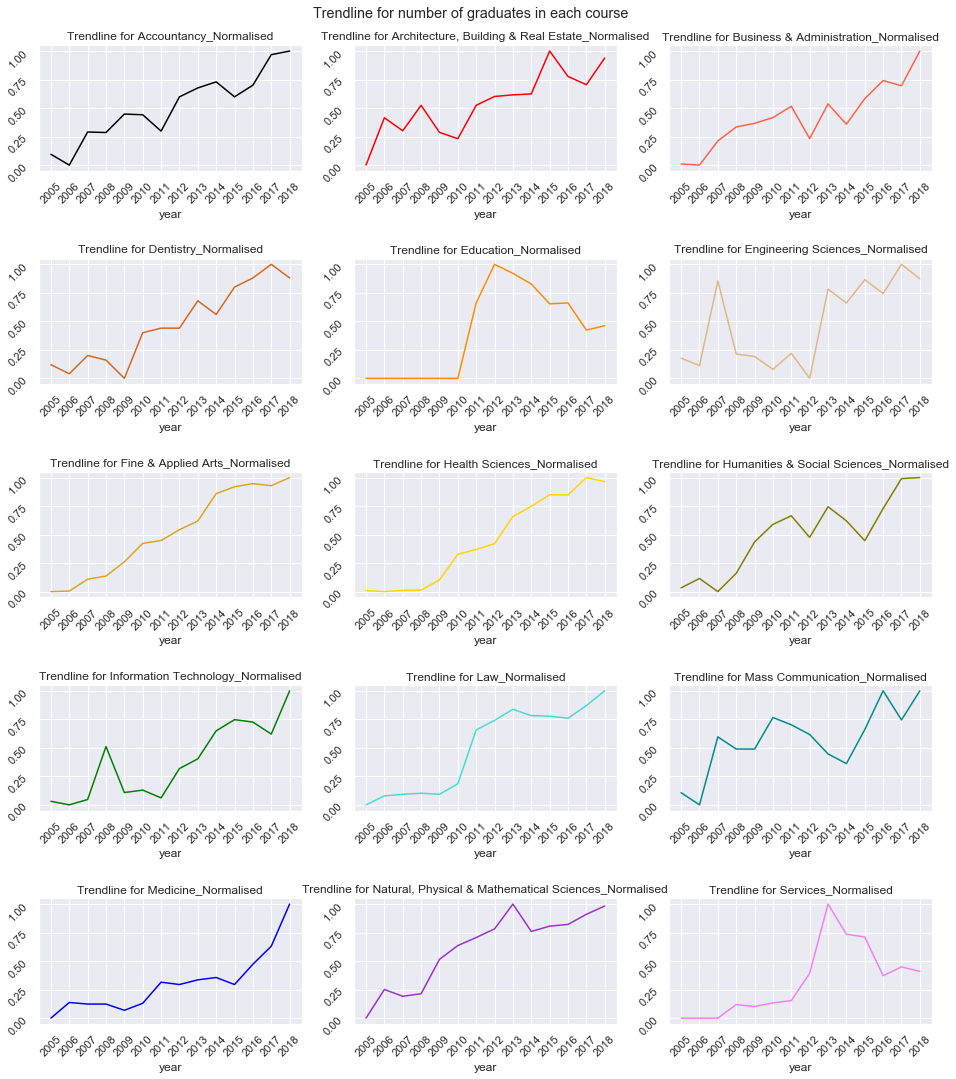

In [28]:
plotting_index = 0 # index to the current plot
column_no = 0
row_no = 0

colors = ['black', 'red', 'tomato', 'chocolate', 'darkorange', 'burlywood', 'goldenrod', 'gold', 
         'olive', 'green', 'turquoise', 'darkcyan', 'blue', 'darkorchid', 'violet'] # all the colors of the plots

courses_keys = ['Accountancy_Normalised','Architecture, Building & Real Estate_Normalised',
                'Business & Administration_Normalised','Dentistry_Normalised','Education_Normalised',
                'Engineering Sciences_Normalised','Fine & Applied Arts_Normalised', 'Health Sciences_Normalised',
                'Humanities & Social Sciences_Normalised', 'Information Technology_Normalised', 'Law_Normalised',
                'Mass Communication_Normalised', 'Medicine_Normalised', 'Natural, Physical & Mathematical Sciences_Normalised',
                'Services_Normalised']


fig, axes = plt.subplots(5, 3,figsize=(16,18)) 

for course_series in courses_keys:
    
    plotting_color = colors[plotting_index]
    
    # Since the fig is 3 by 3
    if column_no == 3:
        column_no = 0
        row_no += 1
        
    ax = axes[row_no][column_no]
    
    # plot the normalised graphs on each ax
    graduates_plot_pivot[course_series].plot(kind="line", ax=ax, color=plotting_color)
    ax.set_xticks(np.arange(2005, 2019, 1))
    ax.tick_params(labelrotation=45)
    ax.set_title("Trendline for " + course_series)
    

    plotting_index += 1
    column_no += 1
    
plt.subplots_adjust(hspace=0.7)
plt.suptitle('Trendline for number of graduates in each course',y=0.91)
plt.show()

### Analysis
- Most courses have an increasing trend in the number of graduates, however it must be noted that the number of graduates does not meant that the employment of that particular course is also increasing, there is still a certain number of people who would pursue what they have studied.

## E) A bar graph for the employment rate in each course

We first measure the employment rate in each University. Basically, we took the average of the employment rate of each course in each university and found the mean. Hence, it might not be very accurate, however it does gives us an idea of how the employment rate in each University is.

employment_rate_overall                                   \
university Nanyang Technological University National University of Singapore   
year                                                                           
2013                              87.643750                        91.209091   
2014                              87.496970                        91.170588   
2015                              88.945455                        91.080556   
2016                              87.641176                        90.579412   
2017                              86.605714                        91.181081   
2018                              88.637838                        91.033333   

                                                                              \
university Singapore Institute of Technology Singapore Management University   
year                                                                           
2013                                     NaN                       94.225000   
2014                               92.645833                       93.450000   
2015                               91.384000                       95.750000   
2016                               89.292308                       95.791667   
2017                               92.482143                       94.608333   
2018                               92.425000                       93.058333   

                                                    \
university Singapore University of Social Sciences   
year                                                 
2013                                           NaN   
2014                                           NaN   
2015                                           NaN   
2016                                           NaN   
2017                                           NaN   
2018                                     93.566667   

                                                          
university Singapore University of Technology and Design  
year                                                      
2013                                                 NaN  
2014                                                 NaN  
2015                                           86.266667  
2016                                           92.966667  
2017                                           93.866667  
2018                                                 NaN

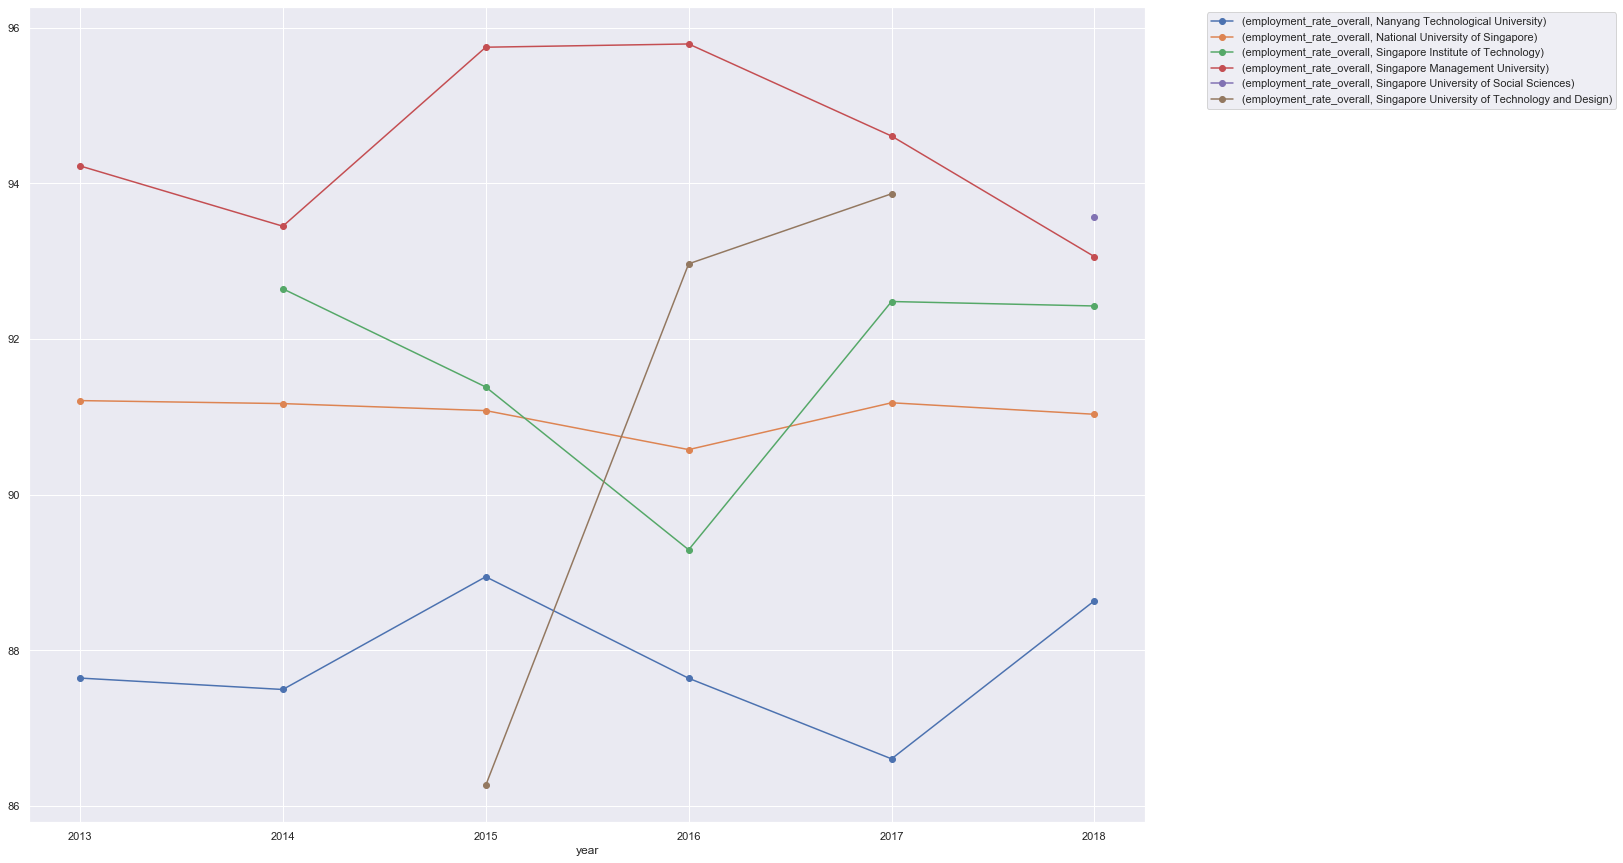

In [29]:
# Preparing the data 
employment_rate_uni = employment_clean_df.groupby(["year", "university"]).mean()
employment_rate_uni = employment_rate_uni.reset_index()
# employment_rate_uni = employment_rate_uni.set_index("year")
employment_rate_uni_pivot = pd.pivot_table(employment_rate_uni, index=["year"], columns=["university"], values=["employment_rate_overall"])
display(employment_rate_uni_pivot)

fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1, 1, 1)
employment_rate_uni_pivot.plot(kind="line",
                               marker="o",
                               ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Analysis
- Employment rate for SMU was high throughout
- NTU has the lowest employment rate compared with the other universities


# 4) Predictive Modelling

The Singapore Standard Educational Classification (SSEC) is a classification of educational programmes and qualifications and is used for surveys and administrative databases. [https://www.singstat.gov.sg/-/media/files/standards_and_classifications/educational_classification/ssec2015-report.pdf]. This was used to help us categorise the degree to each course. 

Actions taken:
Develop model using SciKit Learn's Train, Test and Split model selection.

**X-value**
Numeric data - Basic_monthly_mean
One-Hot Encoded data - University and Degree

**Y-value**
Employment_rate_overall

Next, we split the x and y datasets into training and testing datasets (i.e. 80% Training, 20% Testing)
We will use SK Learn to train the linear regression model using x_train and y_train dataset
With the trained model, we will apply the x_test to predict the y_values --> y_prediction (in this case Employment Rate)
Lastly, to check the effectiveness of our model, we conducted a R-squared regression analysis to test the goodness of fit.

Note: R-squared evaluates the scatter of data points around the fitted regression line.

In [30]:
employment_df = employment_df.iloc[:,:7]
employ_df = employment_df.drop(["employment_rate_ft_perm", "school"], axis=1)
employ_df

,year,university,degree,employment_rate_overall,basic_monthly_mean
0,2013,Nanyang Technological University,Accountancy and Business,97.4,3701
1,2013,Nanyang Technological University,Accountancy (3-yr direct Honours Programme),97.1,2850
2,2013,Nanyang Technological University,Business (3-yr direct Honours Programme),90.9,3053
3,2013,Nanyang Technological University,Business and Computing,87.5,3557
4,2013,Nanyang Technological University,Aerospace Engineering,95.3,3494
...,...,...,...,...,...
698,2018,Singapore Management University,Law #,92.7,4704
699,2018,Singapore Management University,Law (Cum Laude and above) #,94.4,4986
700,2018,Singapore University of Social Sciences,Bachelor of Accountancy,98.7,2858
701,2018,Singapore University of Social Sciences,Bachelor of Science in Finance,88,3364


In [31]:
# Clean the dataset by removing the na values in the dataset
employ_df.drop(employ_df[employ_df["employment_rate_overall"] == "na"]["employment_rate_overall"].index, axis=0, inplace=True)
employ_df.reset_index()
employ_df.shape

(630, 5)

In [32]:
# Finding out how many unique values in degree
employ_df["degree"].unique()

array(['Accountancy and Business',
       'Accountancy (3-yr direct Honours Programme)',
       'Business (3-yr direct Honours Programme)',
       'Business and Computing', 'Aerospace Engineering',
       'Bioengineering', 'Chemical and Biomolecular Engineering',
       'Computer Engineering', 'Civil Engineering', 'Computer Science',
       'Electrical and Electronic Engineering',
       'Environmental Engineering', 'Information Engineering and Media',
       'Materials Engineering', 'Mechanical Engineering',
       'Maritime Studies', 'Art, Design & Media', 'Chinese',
       'Communication Studies', 'Economics', 'English',
       'Linguistics and Multilingual Studies', 'Psychology', 'Sociology',
       'Biomedical Sciences (Traditional Chinese Medicine) #',
       'Biological Sciences', 'Chemistry & Biological Chemistry',
       'Mathematical Science', 'Physics / Applied Physics',
       'Sports Science and Management', 'Science (with Education)',
       'Arts (with Education)', 'Bach

In [33]:
# Integer coding for the different courses into the broad field of study
# Architecture, Building & Real Estate - 1
# Business & Administration - 2
# Education - 3
# Engineering Sciences - 4
# Fine & Applied Arts - 5
# Health Sciences - 6
# Humanities & Social Sciences - 7
# Information Technology - 8
# Law - 9
# Mass Communication - 10
# Natural, Physical & Mathematical Sciences - 11
# Services - 12

def degree_encode_int(x):
    if "Architecture" in x:
        return 1
    elif "Marketing" in x or "Business" in x or "Banking" in x or "Accountancy" in x:
        return 2
    elif "Education" in x:
        return 3
    elif "Engineering" in x:
        return 4
    elif "Art" in x or "Media" in x or "Design" in x:
        return 5
    elif "Pharmacy" in x or "Medicine" in x or "Surgery" in x or "Radiography" in x or "Nursing" in x or "Physiotherapy" in x:
        return 6
    elif "Humanities" in x or "Socialogy" in x or "Pyschology" in x or "Economics" in x or "Social" in x or "History" in x or "Arts" in x or "Philosophy" in x or "Linguistics" in x or "English" in x or "Chinese" in x:
        return 7
    elif "Computer" in x or "Information" in x or "Software" in x or "Technology" in x:
        return 8
    elif "Legal" in x or "Law" in x or "Laws" in x:
        return 9
    elif "Communcation" in x or "Public" in x or "Journalism" in x:
        return 10
    elif "Chemistry" in x or "Physics" in x or "Food" in x or "Environmental" in x or "Mathematical" in x:
        return 11
    else:
        return 12

In [34]:
employ_df["degree_encode"] = employ_df["degree"].apply(degree_encode_int)

In [35]:
employ_df["university"].unique()

array(['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University',
       'Singapore Institute of Technology',
       'Singapore University of Technology and Design',
       'Singapore University of Social Sciences'], dtype=object)

In [36]:
# Encoding the institution to integer
# Nanyang Technological University - 1
# National University of Singapore - 2
# Singapore Management University - 3
# Singapore Institute of Technology - 4
# Singapore University of Technology and Design - 5
# Singapore University of Social Sciences - 6

def encode_university(x):
    if x == "Nanyang Technological University":
        return 1
    elif x == "National University of Singapore":
        return 2
    elif x == "Singapore Management University":
        return 3
    elif x == "Singapore Institute of Technology":
        return 4
    elif x == "Singapore University of Technology and Design":
        return 5
    elif x == "Singapore University of Social Sciences":
        return 6

In [37]:
employ_df["university_encode"] = employ_df["university"].apply(encode_university)

In [38]:
employ_df["employment_rate_overall"] = employ_df["employment_rate_overall"].apply(pd.to_numeric)
employ_df["basic_monthly_mean"] = employ_df["basic_monthly_mean"].apply(pd.to_numeric)

df_x = employ_df[["degree_encode", "university_encode", "basic_monthly_mean"]]
df_y = employ_df[["employment_rate_overall"]]

In [39]:
df_x.corr()

,degree_encode,university_encode,basic_monthly_mean
degree_encode,1.000000,-0.160319,-0.082409
university_encode,-0.160319,1.000000,0.003757
basic_monthly_mean,-0.082409,0.003757,1.000000


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [45]:
from sklearn import datasets, linear_model

multi_employment_lr = linear_model.LinearRegression()

multi_employment_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(multi_employment_lr.coef_)
print(multi_employment_lr.intercept_)

[[-0.45256281  1.0792893   0.00479292]]
[74.68589417]


In [47]:
from sklearn.metrics import r2_score

fitted_values = multi_employment_lr.predict(x_test)

print(r2_score(y_test, fitted_values))

0.3155335829656831


Insights:

From our analysis below on the R-squared analysis, we can see there is an r2 score of ~0.31. This is a relatively low score, which implies that the predicted y-value has a bad fit to the regression line
This also means the model canotn be used to predict the y-values (employment rate).